In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./data/YAHOO_NEWS_APPL.csv')
df

c:\Users\cmglezpdev2\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Unnamed: 0,ticker,Date,category,title,content,Open,High,Low,Close,Adj Close,Volume,label
0,0,AAPL,2020-01-27,opinion,Apple Set To Beat Q1 Earnings Estimates Tech ...,Technology giant Apple NASDAQ AAPL is set ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
1,1,AAPL,2020-01-27,opinion,Tech Daily Intel Results Netflix Surge Appl...,The top stories in this digest are Intel s N...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
2,2,AAPL,2020-01-27,opinion,7 Monster Stock Market Predictions For The Wee...,S P 500 SPY \nThis week will be packed with e...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
3,3,AAPL,2020-01-27,opinion,Apple Earnings Preview 5G Launch Expanding S...,Reports Q1 2020 results on Tuesday Jan 28 ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
4,4,AAPL,2020-01-27,opinion,Buy Surging Apple Microsoft Stock Before Qua...,On today s episode of Full Court Finance here ...,77.514999,77.942497,76.220001,77.237503,75.793358,161940000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15970,15970,AAPL,2012-07-31,opinion,What s Driving China s Real Estate Rally Par...,In the preceding posts I examined the first t...,21.543928,21.846430,21.525715,21.812857,18.624512,462327600,1
15971,15971,AAPL,2012-07-31,opinion,50 Stocks With The Best Dividend Growth In Jul...,Here is a current sheet of companies with fast...,21.543928,21.846430,21.525715,21.812857,18.624512,462327600,1
15972,15972,AAPL,2012-07-23,opinion,Summer Heat Scorches Europe And U S,Europe flares as summer heat continues Summer...,21.228571,21.639286,20.989643,21.565357,18.413187,487975600,1
15973,15973,AAPL,2012-07-23,opinion,Apple Earnings Preview Quarterly Dip On Deck,Last quarter Apple AAPL reported the 2nd bes...,21.228571,21.639286,20.989643,21.565357,18.413187,487975600,1


### Obteniendo los datos reales de Yahoo Finances

El rango de precios va desde `2020-08-07` hasta `2024-06-07`, o sea, aproximandamente 1 año

In [2]:
import yfinance as yf

# apple = yf.Ticker('AAPL')
# apple_values = apple.history(start='2000-01-01', end='2025-05-05')
# apple_values.to_csv('apple.csv')

apple_values = pd.read_csv('./apple.csv')

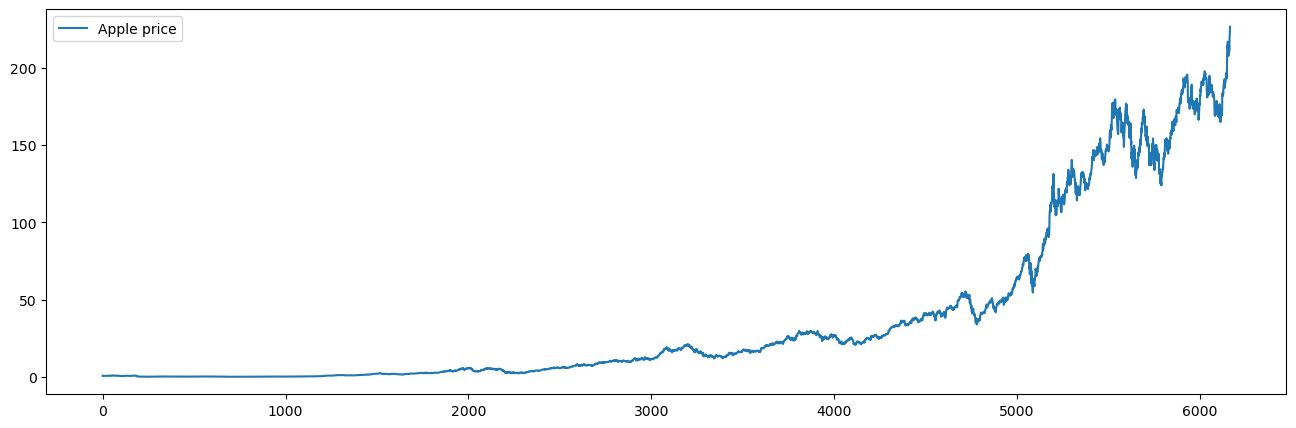

In [3]:
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(apple_values['Close'], label='Apple price')
plt.legend()

Vamos a normalizar la el histórico del precios, pero sin usar el método de MinMax para eso ya que el precio de una acción o tiene limite superior y la cantidad de datos no es suficiente para establecer el límite inferior(podía ser cero pero posiblemente no sería un buen límite)

In [4]:
data = np.array(apple_values['Close']).reshape(-1, 1)
data

array([[  0.84498113],
       [  0.77374047],
       [  0.78506303],
       ...,
       [220.27000427],
       [221.55000305],
       [226.33999634]])

In [5]:
def z_score_normalize(data):
  mean = np.mean(data)
  std = np.std(data)
  return (data - mean) / std, mean, std

def inverse_z_score(normalized_data, mean, std):
  return normalized_data * std + mean

normalized_data, data_mean, data_std = z_score_normalize(data)
print(normalized_data.max())
print(normalized_data.min())
normalized_data, data_mean, data_std

3.455231721141029
-0.684519907161077


(array([[-0.6726777 ],
        [-0.67398183],
        [-0.67377456],
        ...,
        [ 3.34411451],
        [ 3.36754615],
        [ 3.45523172]]),
 37.59129814678397,
 54.626929081553975)

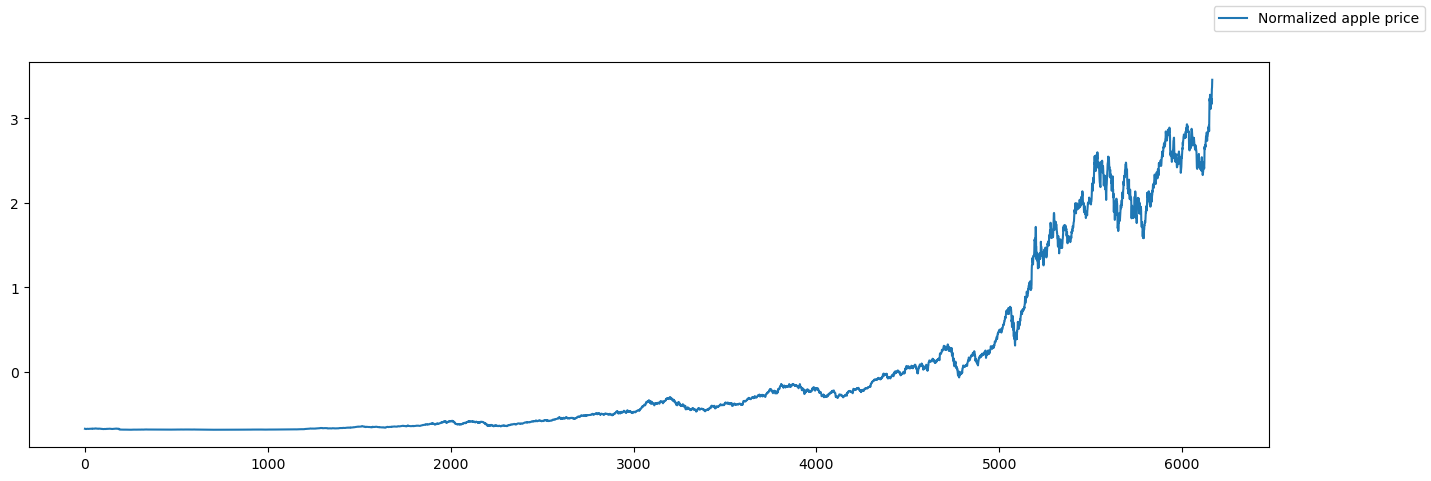

In [6]:
# grafiar la data ya estandarisada
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(normalized_data, label='Normalized apple price')
fig.legend()

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date', ascending=True)
df['Date']

# df['Date'].diff().value_counts()

# set = (df['Date'])

# df['Date'].shape[0] == len(set)

15974   2012-07-23
15973   2012-07-23
15972   2012-07-23
15967   2012-07-24
15968   2012-07-27
           ...    
5       2020-01-27
4       2020-01-27
3       2020-01-27
2       2020-01-27
0       2020-01-27
Name: Date, Length: 15975, dtype: datetime64[ns]